 Health Insurance Cross Sell Prediction

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import io
%cd "C:\Users\91866\Desktop\github_dataset\Capston_3-Health Insurance Cross Sell Prediction"

C:\Users\91866\Desktop\github_dataset\Capston_3-Health Insurance Cross Sell Prediction


In [3]:
train=pd.read_csv("train.csv")

In [4]:
test=pd.read_csv("test.csv")

In [5]:
print(train.shape)
print(test.shape)

(381109, 12)
(127037, 11)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [8]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
train.isnull().sum()
# The Data don't have any null values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [11]:
train.duplicated().sum()
# The Data don't have any duplicated values

0

In [12]:
train_new=train[['Gender','Driving_License','Previously_Insured','Vehicle_Age',
           'Vehicle_Damage','Response']]

In [13]:
train_new.columns

Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Response'],
      dtype='object')

In [14]:
for i in train_new.columns:
    print(train_new[i].unique())

['Male' 'Female']
[1 0]
[0 1]
['> 2 Years' '1-2 Year' '< 1 Year']
['Yes' 'No']
[1 0]


In [15]:
for i in train_new.columns:
    print(train_new[i].value_counts())

Male      206089
Female    175020
Name: Gender, dtype: int64
1    380297
0       812
Name: Driving_License, dtype: int64
0    206481
1    174628
Name: Previously_Insured, dtype: int64
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64
0    334399
1     46710
Name: Response, dtype: int64


<AxesSubplot: xlabel='Response', ylabel='count'>

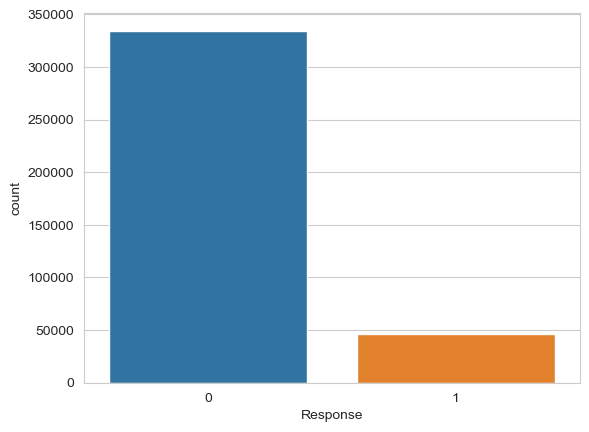

In [16]:
# Making Count plot survived column
sns.set_style('whitegrid')
sns.countplot(x='Response',data=train)

<AxesSubplot: xlabel='Response', ylabel='count'>

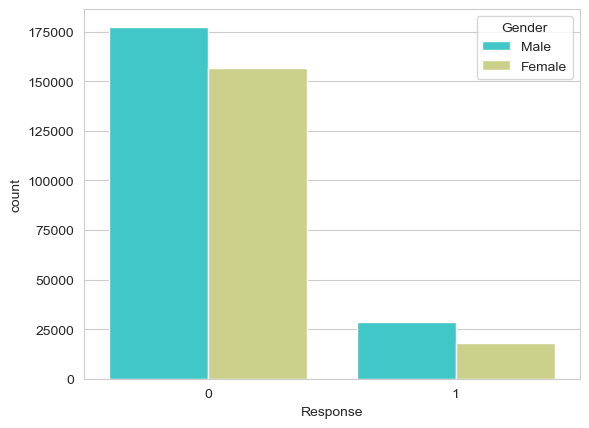

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Response',hue='Gender',data=train,palette='rainbow')

<AxesSubplot: xlabel='Response', ylabel='count'>

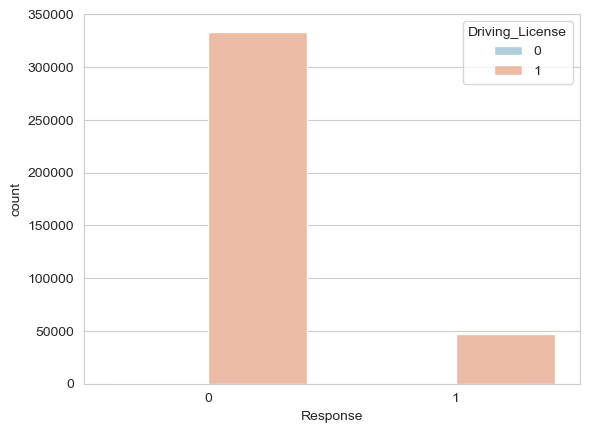

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Response',hue='Driving_License',data=train,palette='RdBu_r')

<AxesSubplot: xlabel='Response', ylabel='count'>

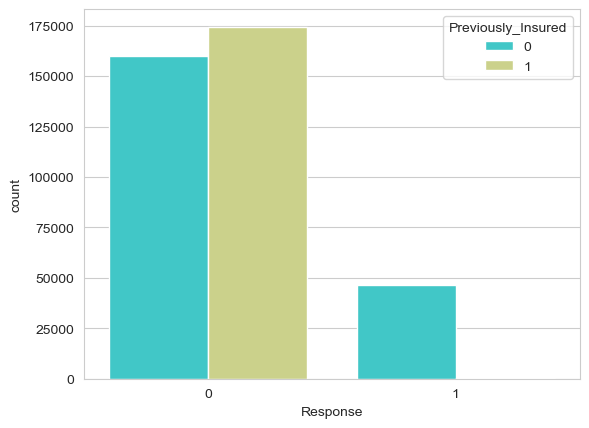

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Response',hue='Previously_Insured',data=train,palette='rainbow')

<AxesSubplot: xlabel='Response', ylabel='count'>

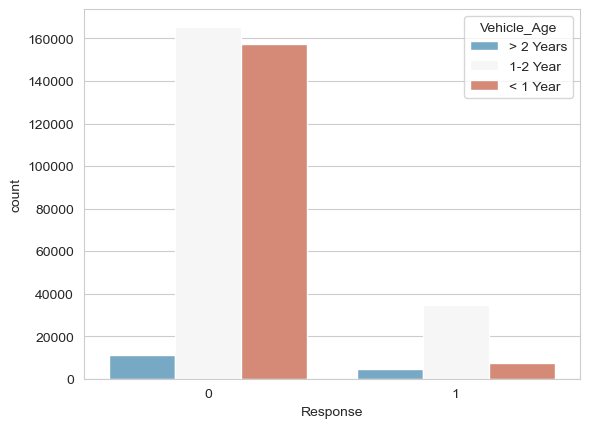

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Response',hue='Vehicle_Age',data=train,palette='RdBu_r')

<AxesSubplot: xlabel='Response', ylabel='count'>

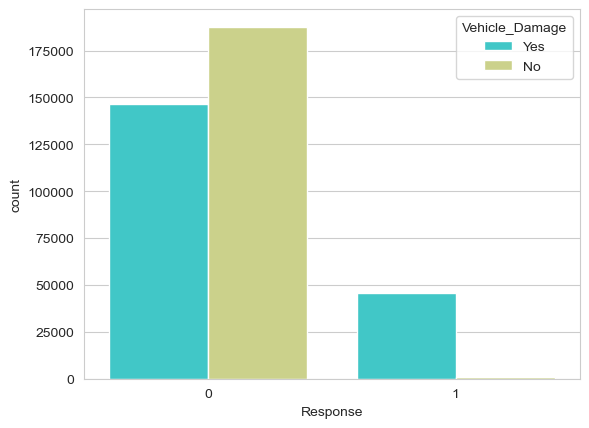

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Response',hue='Vehicle_Damage',data=train,palette='rainbow')

<AxesSubplot: >

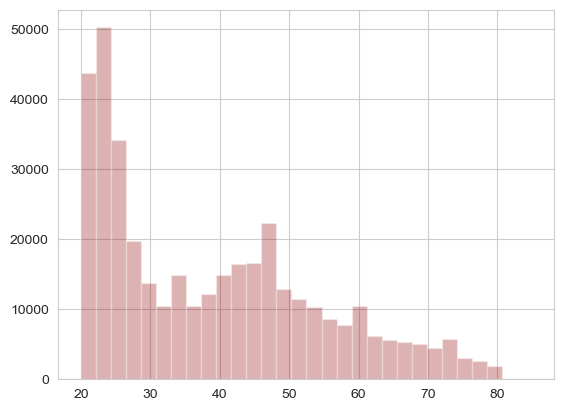

In [22]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot: >

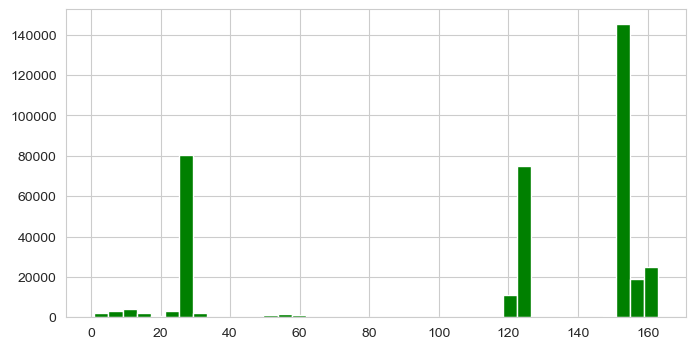

In [23]:
train['Policy_Sales_Channel'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot: >

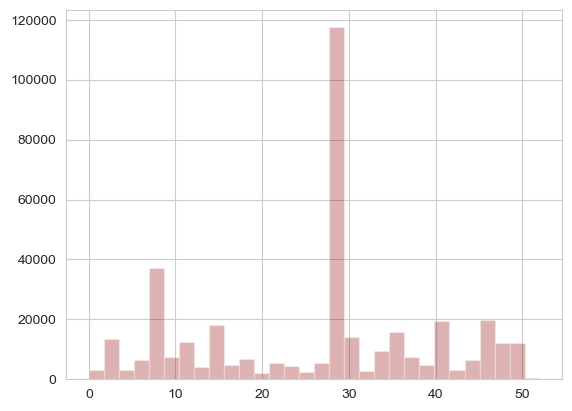

In [24]:
train['Region_Code'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot: >

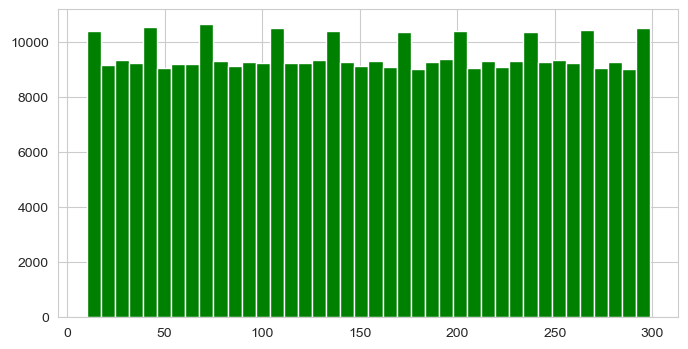

In [25]:
train['Vintage'].hist(color='green',bins=40,figsize=(8,4))

Pieplot for: Gender


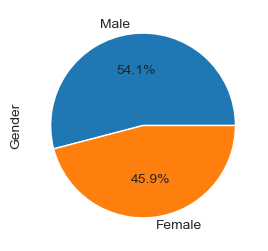

Pieplot for: Driving_License


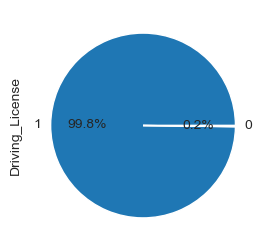

Pieplot for: Previously_Insured


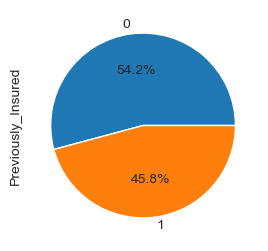

Pieplot for: Vehicle_Age


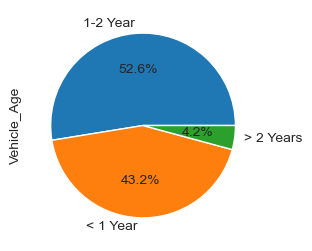

Pieplot for: Vehicle_Damage


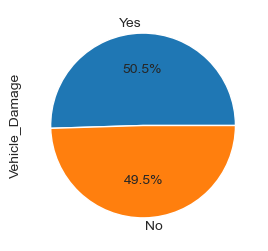

Pieplot for: Response


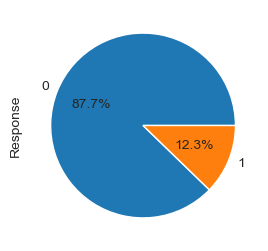

In [26]:
for i in train_new.columns:
    plt.figure(figsize=[6,3],)
    print('Pieplot for:', i)
    train_new[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.show()

As we can see that Males are more likely to buy Vehicle Insurance 


From the above figure, it is clear that the more the age of the vehicle the better as it makes the vehicle insurance cheaper

In [27]:
train.skew()

id                      9.443274e-16
Age                     6.725390e-01
Driving_License        -2.159518e+01
Region_Code            -1.152664e-01
Previously_Insured      1.677471e-01
Annual_Premium          1.766087e+00
Policy_Sales_Channel   -9.000081e-01
Vintage                 3.029517e-03
Response                2.301906e+00
dtype: float64

In [28]:
corr = train.drop('Response',axis=1).corr()

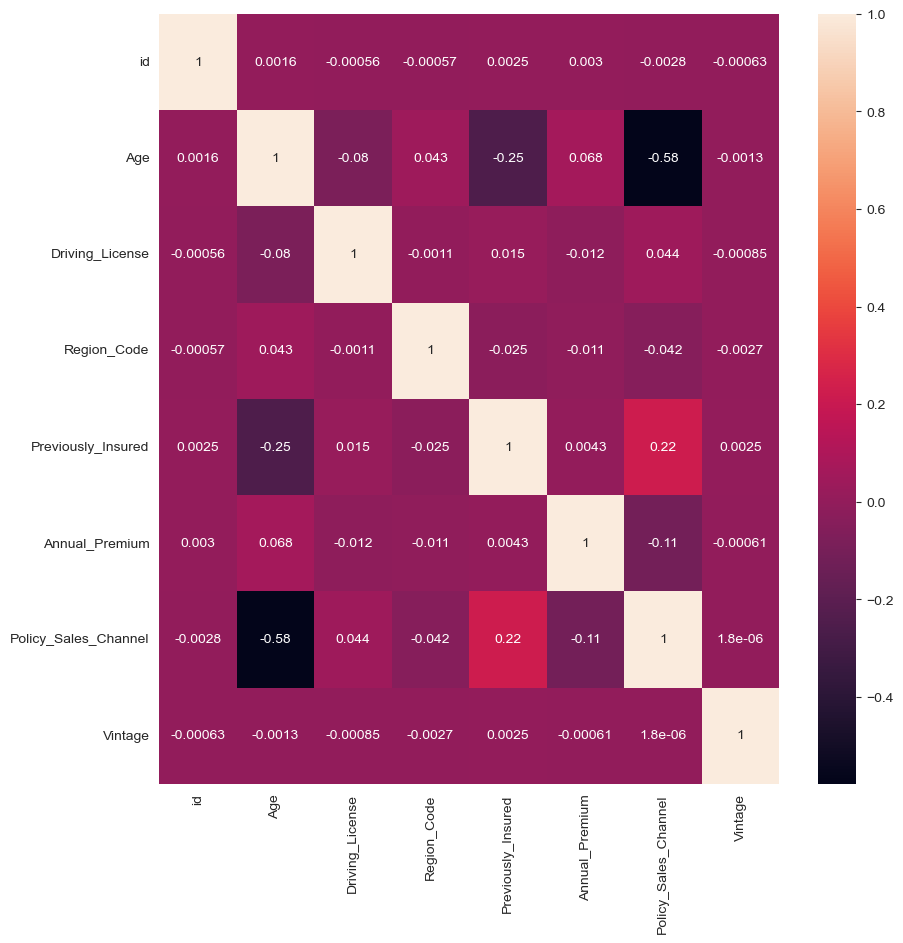

In [29]:
plt.figure(figsize=[10,10])
sns.heatmap(corr, annot = True)
plt.show()

Hypothesis Testing

In [30]:
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


In [31]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.Gender,train.Response))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 1047.7077577887574
Degrees of Freedom : 1
P-Value : 7.665800628415621e-230
Contingency Table : [[153568.9605336  21451.0394664]
 [180830.0394664  25258.9605336]]
p-value=0.000, Null hypothesis is rejected


In [32]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.Previously_Insured,train.Response))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 44357.96472219977
Degrees of Freedom : 1
P-Value : 0.0
Contingency Table : [[181173.99462883  25307.00537117]
 [153225.00537117  21402.99462883]]
p-value=0.000, Null hypothesis is rejected


In [33]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.Driving_License,train.Response))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 38.63411722321234
Degrees of Freedom : 1
P-Value : 5.111753504019177e-10
Contingency Table : [[7.12478551e+02 9.95214492e+01]
 [3.33686521e+05 4.66104786e+04]]
p-value=0.000, Null hypothesis is rejected


In [34]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.Vehicle_Age,train.Response))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 18771.889904151052
Degrees of Freedom : 2
P-Value : 0.0
Contingency Table : [[175764.59775025  24551.40224975]
 [144589.27397149  20196.72602851]
 [ 14045.12827826   1961.87172174]]
p-value=0.000, Null hypothesis is rejected


In [35]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.Vehicle_Damage,train.Response))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 47864.76180117493
Degrees of Freedom : 1
P-Value : 0.0
Contingency Table : [[165568.78400668  23127.21599332]
 [168830.21599332  23582.78400668]]
p-value=0.000, Null hypothesis is rejected


In [36]:
# ANOVA TEST for - Gender with Vehicle_Age
f_stats, p_value = stats.f_oneway(train[train['Vehicle_Age'] == ('> 2 Years')]['Age'],
                                  train[train['Vehicle_Age'] == ('1-2 Year')]['Age'],
                                  train[train['Vehicle_Age'] == ('< 1 Year')]['Age'])

print("--ANOVA hypothesis test--")
print("\n")
print("F_statistics:", f_stats)
print("P-value:", p_value)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--ANOVA hypothesis test--


F_statistics: 319875.9060609708
P-value: 0.0
p-value=0.000, Null hypothesis is rejected


In [37]:
# T TEST for - Gender with Age

f_stats,p_value =stats.ttest_ind(train[train['Gender'] =='Male']['Age'],
                                  train[train['Gender'] =='Female']['Age'])

print("--T-test hypothesis test--")
print("\n")
print("statistics:",f_stats)
print("P-value:", p_value)                                 
                                  
if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--T-test hypothesis test--


statistics: 90.81763394795337
P-value: 0.0
p-value=0.000, Null hypothesis is rejected


In [38]:
# T TEST for - Driving_License' with Age
f_stats,p_value = stats.ttest_ind(train[train['Driving_License'] =='1']['Age'],
                                  train[train['Driving_License'] =='0']['Age'])
print("--T-test hypothesis test--")
print("\n")
print("statistics:",f_stats)
print("P-value:", p_value)                                 
                                  

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--T-test hypothesis test--


statistics: nan
P-value: nan
p-value=nan failed to reject null hypothesis.


In [39]:
# T TEST for - Vehicle_Damage with Age
f_stats, p_value = stats.ttest_ind(train[train['Vehicle_Damage'] =='Yes']['Age'],
                                  train[train['Vehicle_Damage'] =='No']['Age'])
print("--T-test hypothesis test--")
print("\n")
print("statistics:",f_stats)
print("P-value:", p_value)                                 
                                  

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--T-test hypothesis test--


statistics: 171.4073550073171
P-value: 0.0
p-value=0.000, Null hypothesis is rejected


In [40]:
# T TEST for - Policy_Sales_Channel with Age

f_stats,p_value =stats.ttest_ind(train[train['Gender'] =='Male']['Policy_Sales_Channel'],
                                  train[train['Gender'] =='Female']['Policy_Sales_Channel'])

print("--T-test hypothesis test--")
print("\n")
print("statistics:",f_stats)
print("P-value:", p_value)                                 
                                  
if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--T-test hypothesis test--


statistics: -69.05056156554915
P-value: 0.0
p-value=0.000, Null hypothesis is rejected


In [41]:
# T TEST for - Vehicle_Damage with Policy_Sales_Channel
f_stats, p_value = stats.ttest_ind(train[train['Vehicle_Damage'] =='Yes']['Policy_Sales_Channel'],
                                  train[train['Vehicle_Damage'] =='No']['Policy_Sales_Channel'])
print("--T-test hypothesis test--")
print("\n")
print("statistics:",f_stats)
print("P-value:", p_value)                                 
                                  

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--T-test hypothesis test--


statistics: -142.14074070221042
P-value: 0.0
p-value=0.000, Null hypothesis is rejected


Encoding the Categorical column

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [42]:
# converting categorical column 
train.replace({'Gender':{'Male':0,'Female':1},
               'Vehicle_Age':{'1-2 Year':0,'< 1 Year':1,'> 2 Years':2},
               'Vehicle_Damage':{'Yes':0,'No':1}},
              inplace=True)

In [43]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,0,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,0,1,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,0,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,1,1,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,1,1,27496.0,152.0,39,0


In [44]:
#seperating Features and target
X=train.drop(columns=['id','Response'],axis=1)
y = train['Response']

In [45]:
print(X)

        Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            0   44                1         28.0                   0   
1            0   76                1          3.0                   0   
2            0   47                1         28.0                   0   
3            0   21                1         11.0                   1   
4            1   29                1         41.0                   1   
...        ...  ...              ...          ...                 ...   
381104       0   74                1         26.0                   1   
381105       0   30                1         37.0                   1   
381106       0   21                1         30.0                   1   
381107       1   68                1         14.0                   0   
381108       0   46                1         29.0                   0   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0                 2               0         40

In [46]:
print(y)

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64


Model Building

Spiliting Dataset into training(70%) and test set(30%)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [49]:
X_train.shape

(266776, 10)

In [50]:
X_test.shape

(114333, 10)

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, RocCurveDisplay

Applying Machine Learning Algorithm for Classification Problem

Logistic Regression

In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [52]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [53]:
y_pred = logmodel.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.20      0.01      0.01     14138

    accuracy                           0.87    114333
   macro avg       0.54      0.50      0.47    114333
weighted avg       0.79      0.87      0.82    114333



In [55]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.873545,0.202602,0.00771,0.014854,0.501714


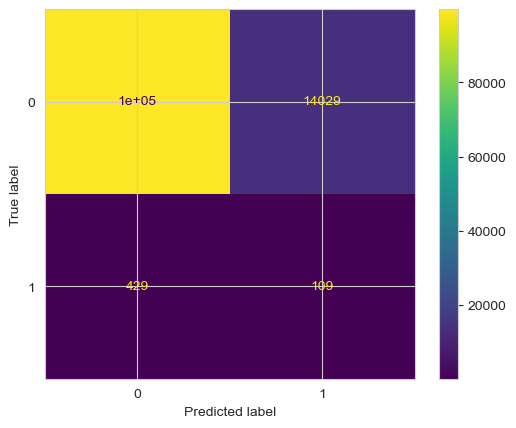

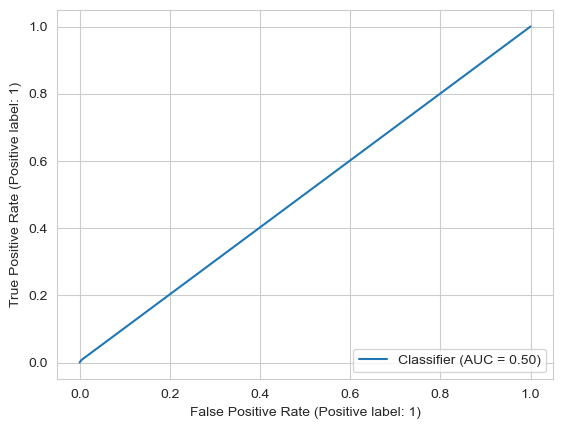

In [56]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)
RocCurveDisplay.from_predictions(y_test,y_pred)

Decision Tree Classification

The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

Advantages of Decision Trees Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

Disadvantages of Decision Trees Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.

In [57]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [58]:
dct.fit(X_train,y_train)
y_pred = dct.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90    100195
           1       0.30      0.30      0.30     14138

    accuracy                           0.82    114333
   macro avg       0.60      0.60      0.60    114333
weighted avg       0.83      0.82      0.83    114333



In [60]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.824792,0.296365,0.303367,0.299825,0.600867


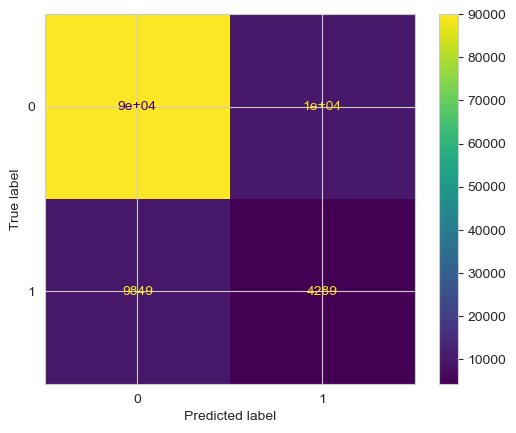

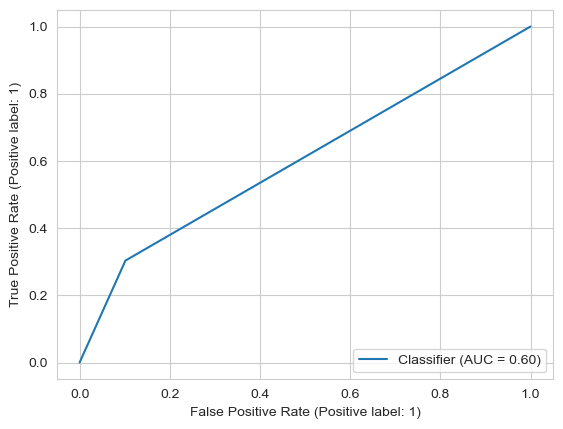

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
RocCurveDisplay.from_predictions(y_test,y_pred)

Random Forest Classification

Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

Step1:- Pick at random K data points from the training set

Step2:- Build the Decision tree associated to these K data points

Step3:- Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

Step4:- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [63]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93    100195
           1       0.37      0.12      0.18     14138

    accuracy                           0.87    114333
   macro avg       0.63      0.54      0.55    114333
weighted avg       0.82      0.87      0.83    114333



In [65]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.866347,0.372062,0.117556,0.178662,0.54478


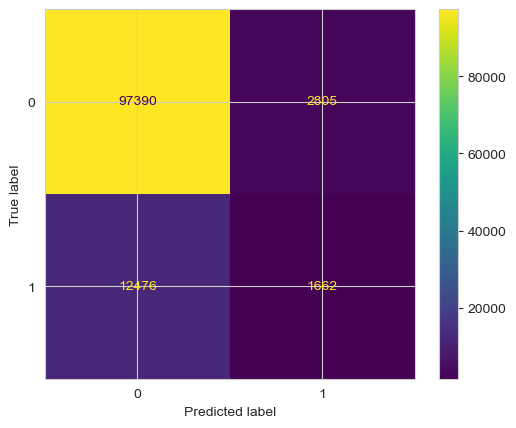

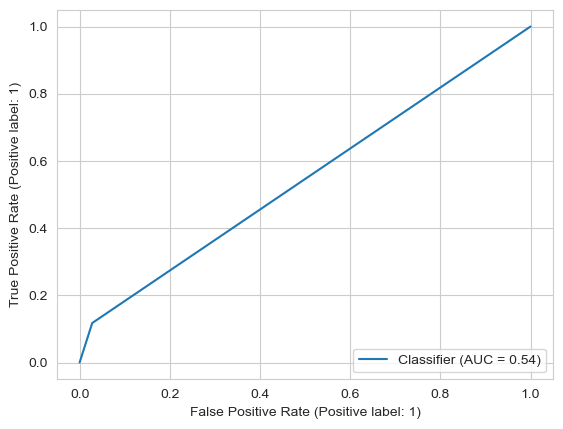

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
RocCurveDisplay.from_predictions(y_test,y_pred)

Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_mod = gnb.fit(X_train,y_train)

In [68]:
y_pred=gnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91    100195
           1       0.32      0.27      0.29     14138

    accuracy                           0.84    114333
   macro avg       0.61      0.59      0.60    114333
weighted avg       0.83      0.84      0.83    114333



In [69]:
# from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.839924,0.322325,0.267152,0.292157,0.593948


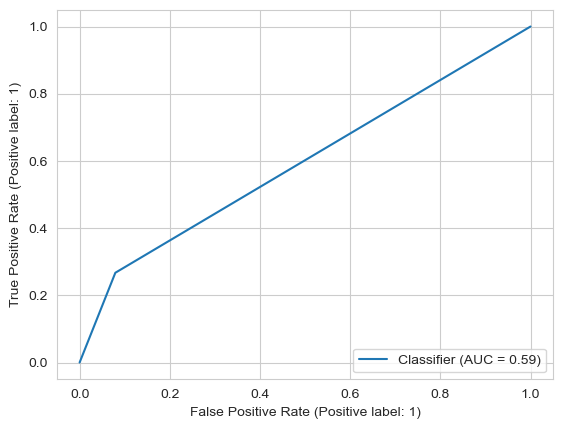

In [70]:
RocCurveDisplay.from_predictions(y_test,gnb_mod.predict(X_test))

KNeighborsClassifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
#Predicting the Test set results
y_pred = knn.predict(X_test)

In [73]:
# from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['K_Neighbours Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K_Neighbours Classifier,0.857189,0.205328,0.053968,0.085471,0.512248


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92    100195
           1       0.21      0.05      0.09     14138

    accuracy                           0.86    114333
   macro avg       0.54      0.51      0.50    114333
weighted avg       0.80      0.86      0.82    114333



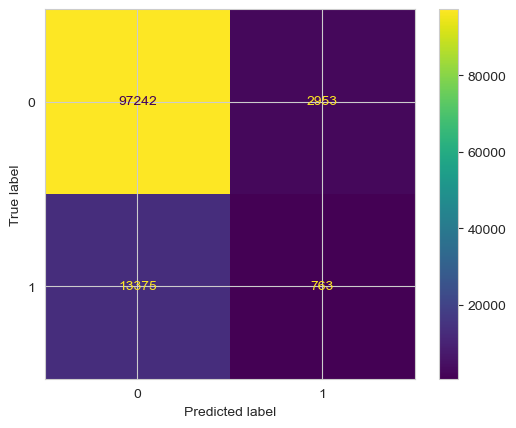

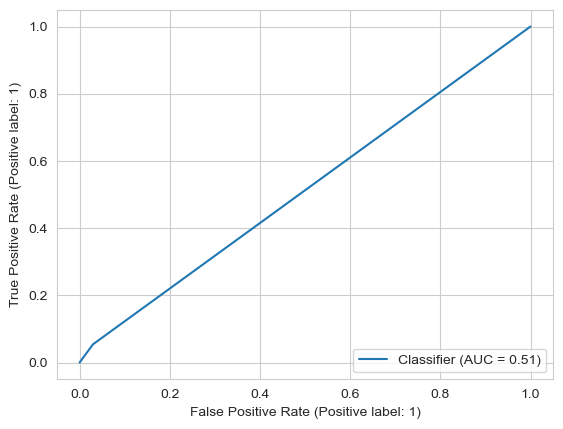

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
RocCurveDisplay.from_predictions(y_test,y_pred)

Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gbmod = gb.fit(X_train,y_train)

In [77]:
#Predicting the Test set results
y_pred = gb.predict(X_test)

In [78]:
# from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Gradient Boosting', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gradient Boosting,0.876335,0.333333,0.000071,0.000141,0.500025


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.33      0.00      0.00     14138

    accuracy                           0.88    114333
   macro avg       0.60      0.50      0.47    114333
weighted avg       0.81      0.88      0.82    114333



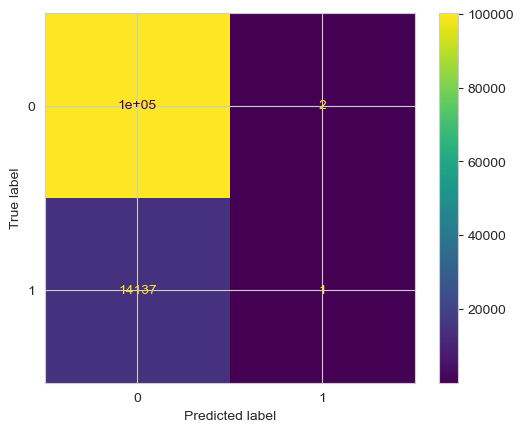

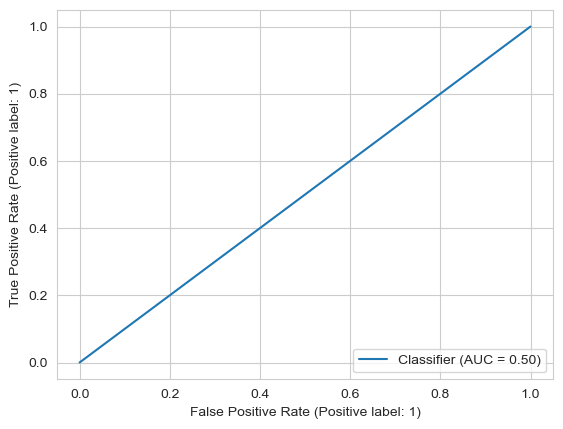

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
RocCurveDisplay.from_predictions(y_test,y_pred)

XG Boost

In [81]:
!pip install xgboost

In [82]:
import xgboost as xgb
xgb_classifer = xgb.XGBClassifier()
xgb_mod = xgb_classifer.fit(X_train,y_train)

In [83]:
y_pred=xgb_classifer.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.48      0.03      0.05     14138

    accuracy                           0.88    114333
   macro avg       0.68      0.51      0.49    114333
weighted avg       0.83      0.88      0.82    114333



In [84]:
# from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['XG Boost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XG Boost,0.876046,0.479419,0.02801,0.052927,0.511859


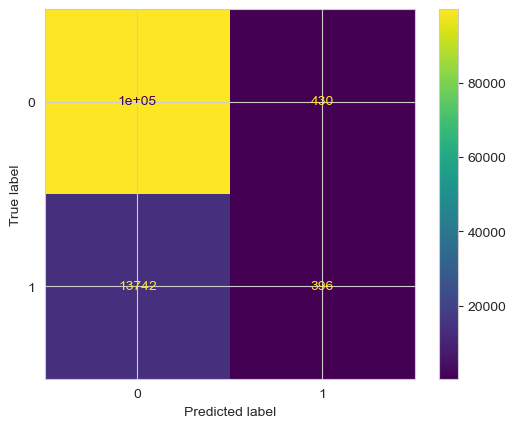

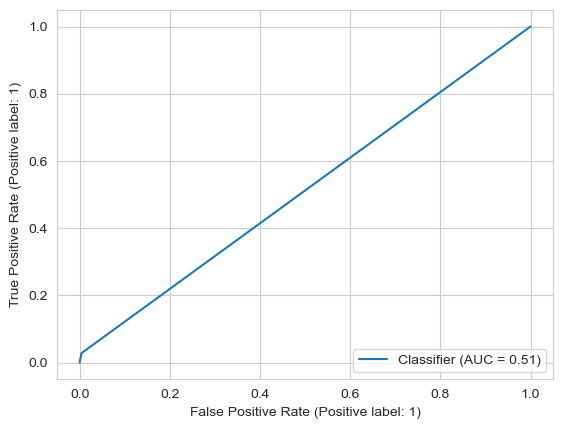

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
RocCurveDisplay.from_predictions(y_test,y_pred)

Cat Boost

In [86]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat_mod = cat.fit(X_train,y_train)

Learning rate set to 0.111918
0:	learn: 0.5103417	total: 219ms	remaining: 3m 38s
1:	learn: 0.4326109	total: 284ms	remaining: 2m 21s
2:	learn: 0.3686186	total: 356ms	remaining: 1m 58s
3:	learn: 0.3339575	total: 422ms	remaining: 1m 45s
4:	learn: 0.3132161	total: 491ms	remaining: 1m 37s
5:	learn: 0.3004105	total: 556ms	remaining: 1m 32s
6:	learn: 0.2926470	total: 616ms	remaining: 1m 27s
7:	learn: 0.2870843	total: 679ms	remaining: 1m 24s
8:	learn: 0.2829709	total: 750ms	remaining: 1m 22s
9:	learn: 0.2800271	total: 817ms	remaining: 1m 20s
10:	learn: 0.2777103	total: 882ms	remaining: 1m 19s
11:	learn: 0.2759834	total: 951ms	remaining: 1m 18s
12:	learn: 0.2742782	total: 1.01s	remaining: 1m 17s
13:	learn: 0.2733616	total: 1.09s	remaining: 1m 16s
14:	learn: 0.2725624	total: 1.16s	remaining: 1m 16s
15:	learn: 0.2715502	total: 1.23s	remaining: 1m 15s
16:	learn: 0.2706455	total: 1.29s	remaining: 1m 14s
17:	learn: 0.2701613	total: 1.35s	remaining: 1m 13s
18:	learn: 0.2697893	total: 1.41s	remaining:

In [87]:
y_pred=cat.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.49      0.03      0.06     14138

    accuracy                           0.88    114333
   macro avg       0.68      0.51      0.50    114333
weighted avg       0.83      0.88      0.83    114333



In [88]:
# from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Cat Boost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Cat Boost,0.876142,0.487753,0.032395,0.060755,0.513797


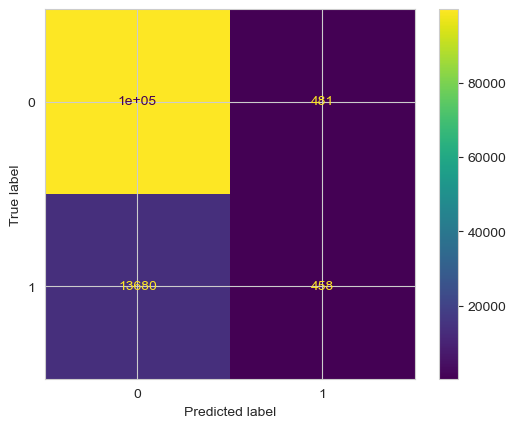

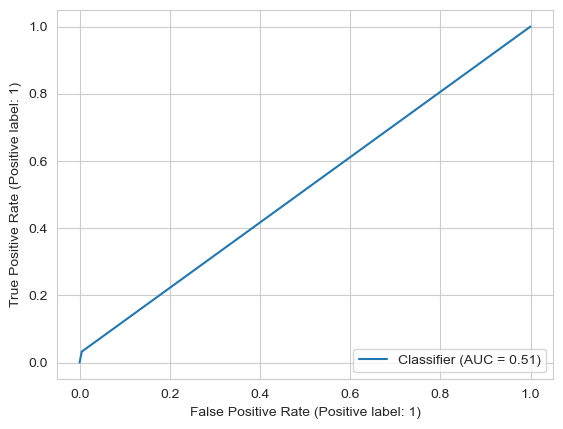

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
RocCurveDisplay.from_predictions(y_test,y_pred)

Logistic Regression-0.8735

Decision Tree Algorithm-0.8247

Random Forest Algorithm -0.86634

Gaussian Naive Bayes- 0.839924

KNeighborsClassifier- 0.857189

Gradient Boosting Classifier - 0.876335

XB boost - 0.87604

Cat boost -0.87614


We will be goining with the Gradient Boosting Classifier as when we compare both the accuracy of Random Forest and other models are 88% with the default values and the other models are also having low accuracy.

So, In future we can go with Smote analysis as well as we have inbalance target variable 
SMOTE will oversample the minority class and balanced tha variable by creating synthetic example in minority class

Which will give more accuracy as compared to without smote algorithm

Conclusion-

We mainly focuse on Hypothesis testing and feature importance

1) Males are more likely to buy Vehicle Insurance

2) The more the age of the vehicle the better as it makes the vehicle insurance cheaper.

3) Vehical insurance will only given to person having driving licens.

4) Previously_Insured person likely to get vehical insurance 